In [1]:
import numpy as np
import h5py
import os
import itertools

import plotting as plo

In [2]:
%load_ext autoreload
%autoreload 2

# distributions event based dataset

In [8]:
input_dir = '/eos/home-k/kiwoznia/data/ada_hack_hlt_data'
file_name = 'flat_scouting_384_numEvent500_event.h5'

In [9]:
ff = h5py.File(os.path.join(input_dir, file_name),'r')

In [10]:
keys = list(ff.keys())

In [11]:
keys

['Ele_cart',
 'Ele_cyl',
 'FatJet_cart',
 'FatJet_cyl',
 'FeatureNames_cart',
 'FeatureNames_cyl',
 'Jet_cart',
 'Jet_cyl',
 'Muon_cart',
 'Muon_cyl',
 'Pfcand_cart',
 'Pfcand_cyl',
 'Pho_cart',
 'Pho_cyl']

In [14]:
num_particles = 0
for k in keys:
    ele = np.array(ff.get(k))
    print(k, ele.shape)
    num_particles += ele.shape[1] if 'Name' not in k else 0
print('num objects ', (num_particles-2000)/2)

Ele_cart (500, 6, 3)
Ele_cyl (500, 6, 3)
FatJet_cart (500, 20, 3)
FatJet_cyl (500, 20, 3)
FeatureNames_cart (3,)
FeatureNames_cyl (3,)
Jet_cart (500, 20, 3)
Jet_cyl (500, 20, 3)
Muon_cart (500, 6, 3)
Muon_cyl (500, 6, 3)
Pfcand_cart (500, 1000, 3)
Pfcand_cyl (500, 1000, 3)
Pho_cart (500, 20, 3)
Pho_cyl (500, 20, 3)
num objects  144


In [17]:
feature_names_keys = [k for k in keys if 'Names' in k]
feature_keys = [k for k in keys if k not in feature_names_keys]

In [18]:
feature_names_keys

['FeatureNames_cart', 'FeatureNames_cyl']

In [19]:
feature_keys

['Ele_cart',
 'Ele_cyl',
 'FatJet_cart',
 'FatJet_cyl',
 'Jet_cart',
 'Jet_cyl',
 'Muon_cart',
 'Muon_cyl',
 'Pfcand_cart',
 'Pfcand_cyl',
 'Pho_cart',
 'Pho_cyl']

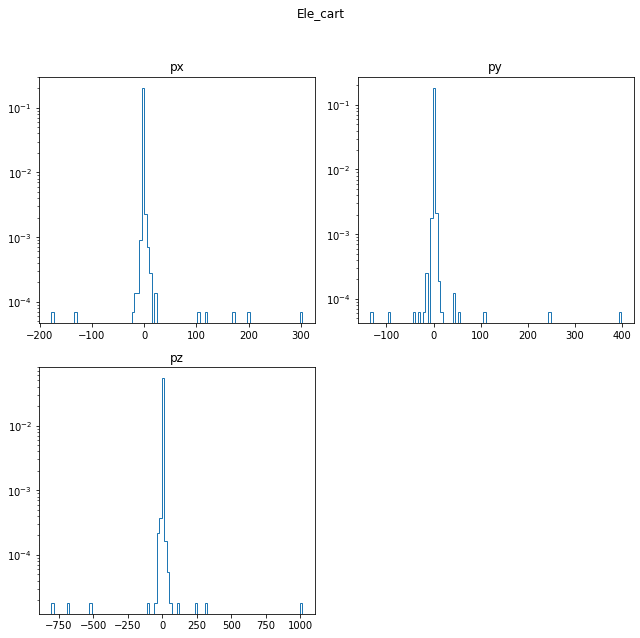

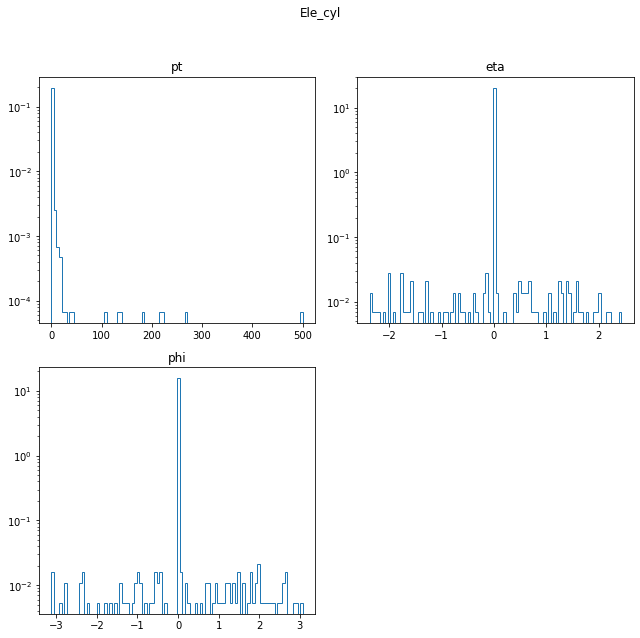

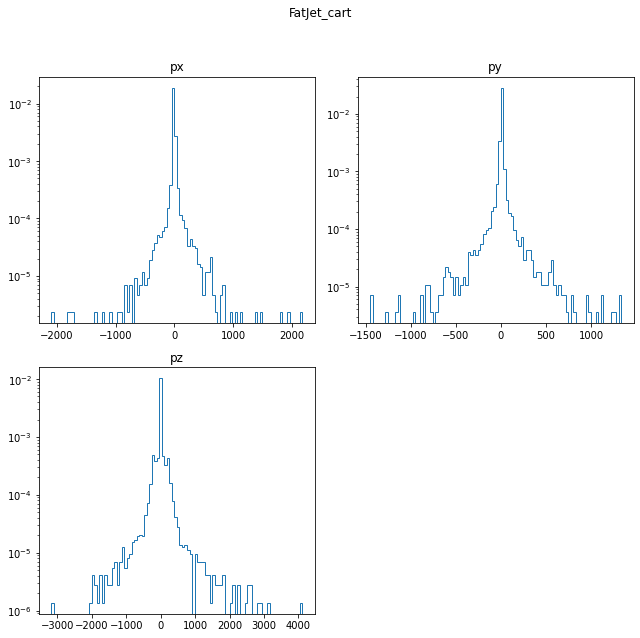

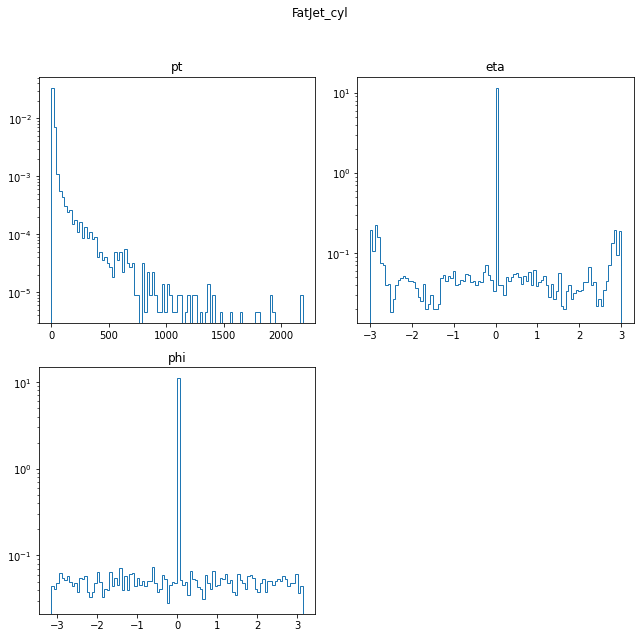

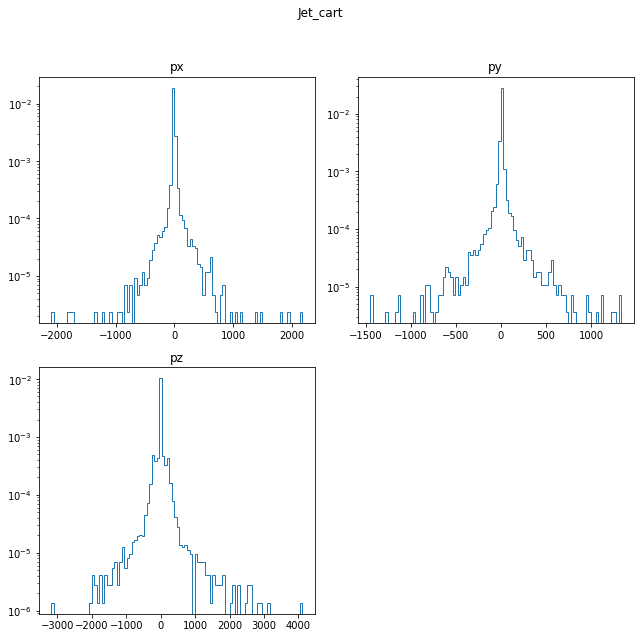

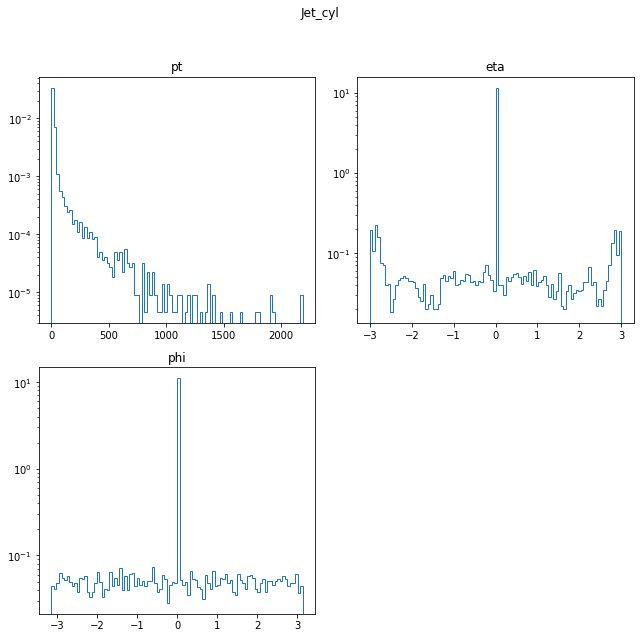

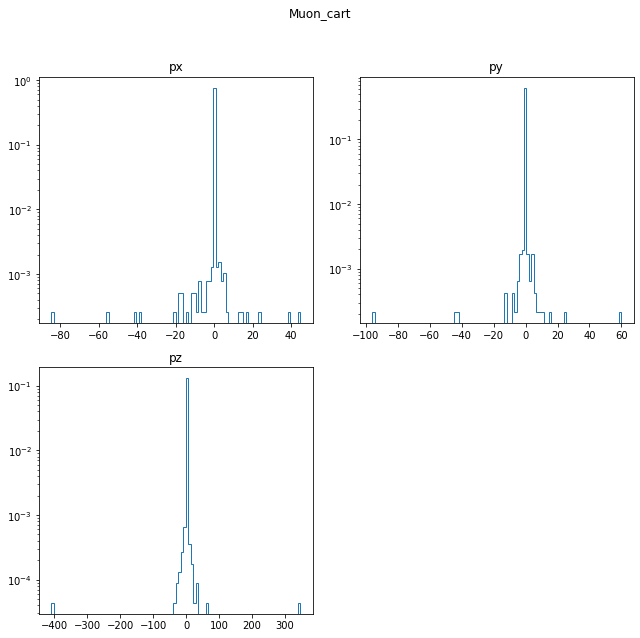

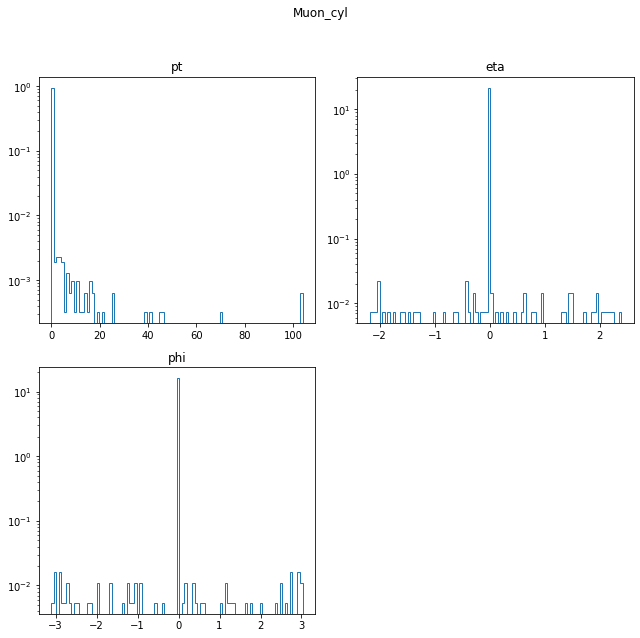

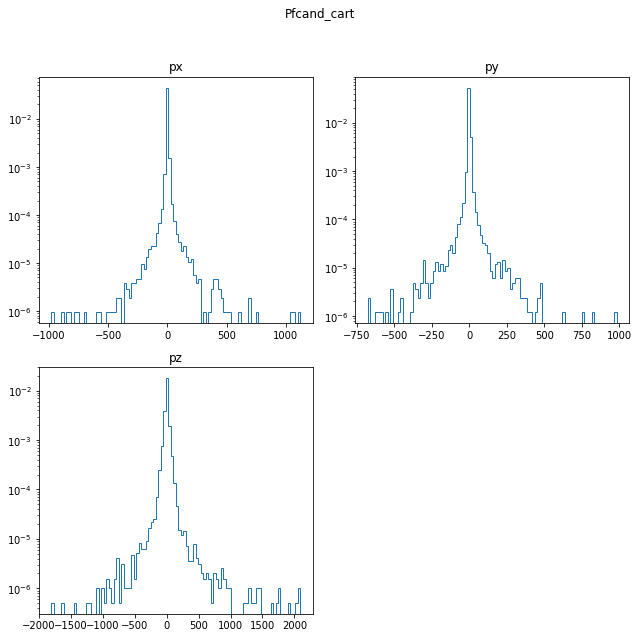

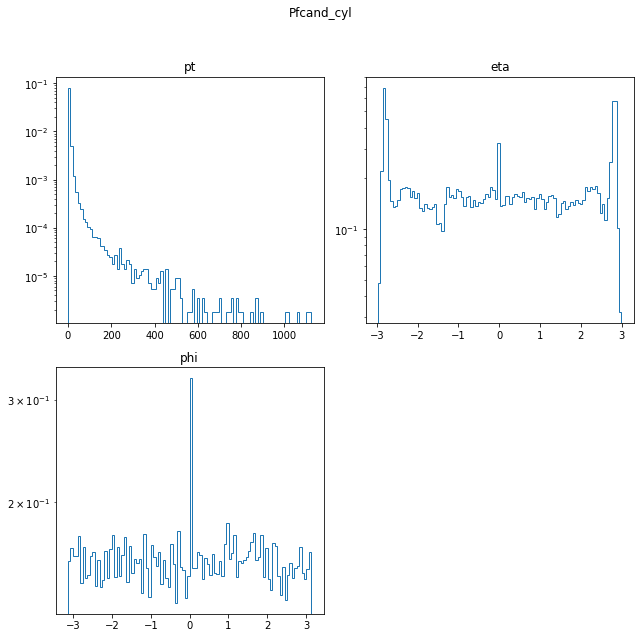

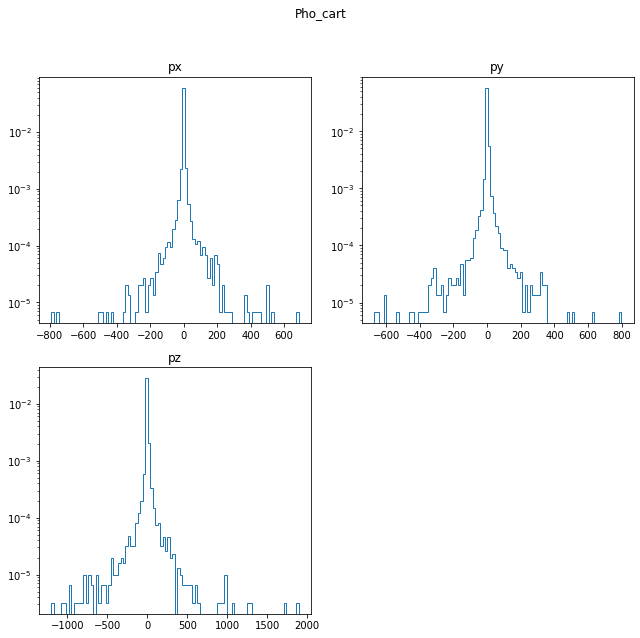

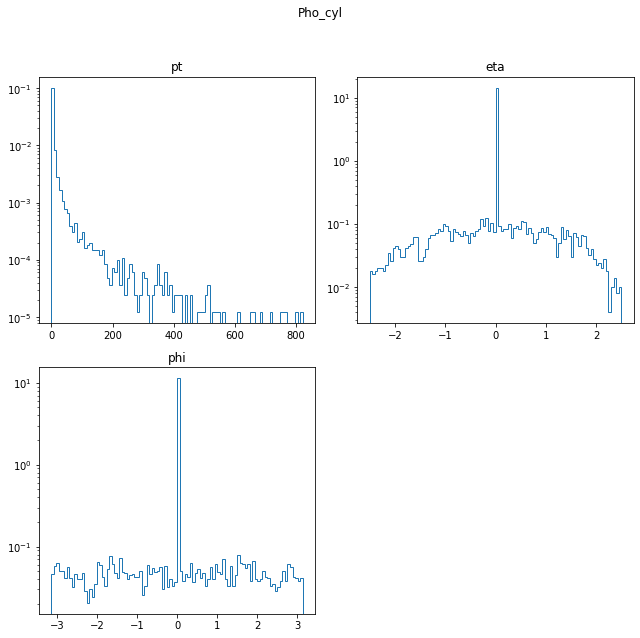

In [21]:
for feat_key, names_key in zip(feature_keys,itertools.cycle(feature_names_keys)):
    part_feat_names = [n.decode("utf-8") for n in list(ff.get(names_key))]
    part_feat = np.array(ff.get(feat_key))
    plo.plot_multihist(part_feat.transpose(), suptitle=feat_key, titles=part_feat_names)

# distributions jet based dataset

In [22]:
input_dir = '/eos/home-k/kiwoznia/data/ada_hack_hlt_data'
file_name = 'flat_scouting_384_numEvent500_jetbased.hd5'

In [23]:
ff = h5py.File(os.path.join(input_dir, file_name),'r')

In [24]:
keys = list(ff.keys())

In [25]:
feature_names_keys = [k for k in keys if 'Names' in k]
feature_keys = [k for k in keys if k not in feature_names_keys]

In [33]:
feature_names_keys

['jetFeatureNames', 'particleFeatureNames']

In [34]:
feature_keys

['fatjets', 'jetConstituentList']

In [35]:
names = [n.decode("utf-8") for n in list(ff.get('particleFeatureNames'))]

In [36]:
names

['pfcandpdgid',
 'pfcandvertex',
 'pfcandfjidx',
 'pfcandpt',
 'pfcandeta',
 'pfcandphi',
 'pdcandm',
 'px',
 'py',
 'pz']

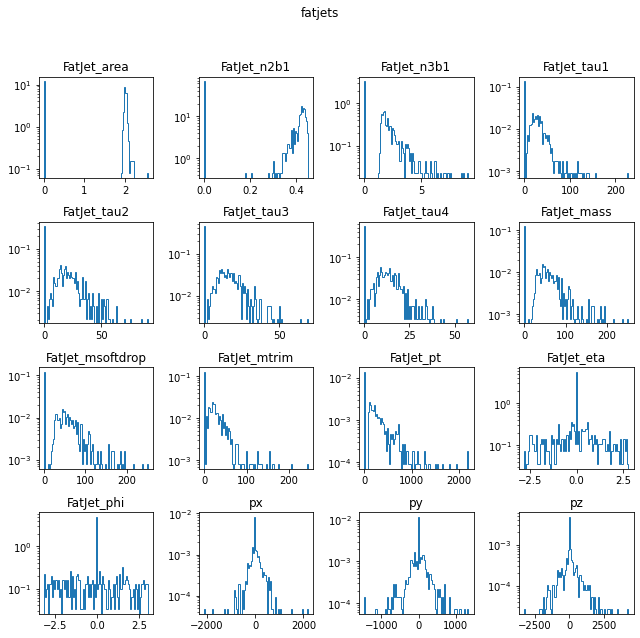

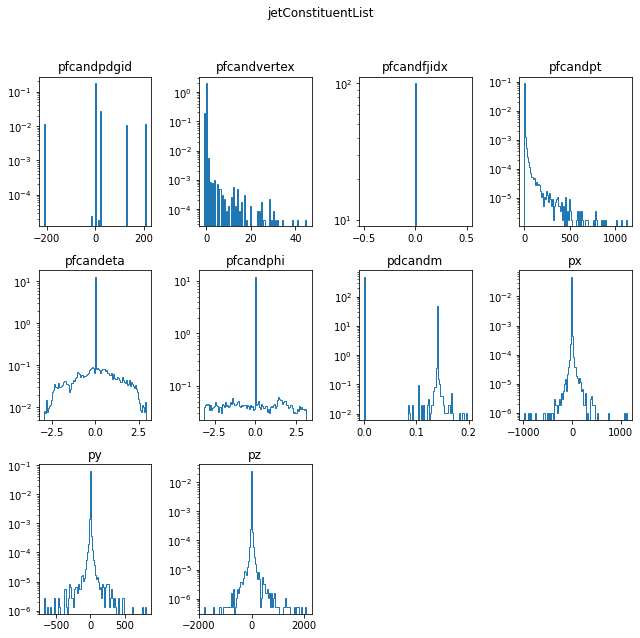

In [38]:
for feat_key, names_key in zip(feature_keys, feature_names_keys):
    part_feat_names = [n.decode("utf-8") for n in list(ff.get(names_key))]
    part_feat = np.array(ff.get(feat_key))
    plo.plot_multihist(part_feat.transpose(), suptitle=feat_key, titles=part_feat_names)